In [67]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [68]:
#Reading the training data
df=pd.read_csv('news.csv')

#Getting shape and head
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [69]:
#Getting the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [72]:
X = df['text']
y = df['label']

#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [73]:
#Initializing a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fitting and transforming the train and test data
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Initializing a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

# Predicting on the test set
y_pred = pac.predict(tfidf_test)

# Calculating accuracy
score = accuracy_score(y_test, y_pred)
print('Accuracy:', '{:.2f}%'.format(score * 100))

Accuracy: 93.56%


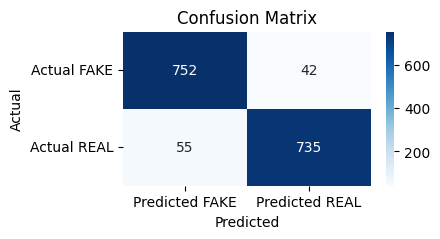

In [83]:
#confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted FAKE', 'Predicted REAL'], yticklabels=['Actual FAKE', 'Actual REAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [78]:
#Test data reading
try:
    df_test = pd.read_csv('test_data.csv', engine='python')
except pd.errors.ParserError as e:
    print("ParserError:", e)

if 'df_test' in locals():

    X_test = df_test['text']  #'text' is feature column
    y_test = df_test['label'] #'label' is target column


ParserError: Expected 4 fields in line 13, saw 6


In [84]:
    # Initializing a TfidfVectorizer with the same parameters as used during training
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

    # Fitting and transforming the training data to learn the vocabulary and IDF weights
    tfidf_train = tfidf_vectorizer.fit_transform(X_train)

    # Transforming the test data using the fitted vectorizer
    tfidf_test = tfidf_vectorizer.transform(X_test)

    # Initializing PassiveAggressiveClassifier
    pac = PassiveAggressiveClassifier(max_iter=50)
    pac.fit(tfidf_train, y_train)

    # Predicting on the test set
    y_pred = pac.predict(tfidf_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy:', '{:.2f}%'.format(accuracy * 100))


Accuracy: 93.06%


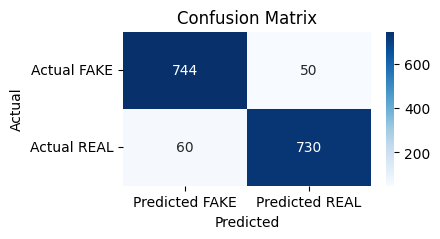

In [86]:
#confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted FAKE', 'Predicted REAL'], yticklabels=['Actual FAKE', 'Actual REAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()